# Pandas

Python Data Analysis Libraryであり、データを扱うために使用されるライブラリ。
以下のチュートリアルは

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

から参照してきたもの。

In [1]:
import numpy as np
import pandas as pd

# データ構造

## Series

1次元のデータを格納することのできるクラス。

```python
s = pd.Series(data, index=index)
```

- data：一般的なオブジェクトを取れる（dict型、ndarray, 数値）
- index：データのインデックスを指定する

In [2]:
s = pd.Series(np.random.randn(5))
s

0   -1.657444
1   -1.329960
2    0.212609
3   -0.963795
4   -0.097932
dtype: float64

`index`引数に任意のリストを渡すと、引数を指定することもできる。

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

print(s, "\n")
print(s.index)        # index の表示
print(s.index[0])    # indexの0要素目にアクセス
print(len(s.index)) # index配列の長さ

a    0.380889
b   -1.078738
c   -0.258870
d    0.972179
e   -0.826147
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
a
5


pandasではインデックスを一意でない付け方も可能であることに留意。重複したインデックスにアクセスすると、`Series`として取ってこれる。

In [4]:
s = pd.Series(np.random.randn(6), index=list("AABBCC"))
s

A   -0.921376
A   -0.656189
B   -0.641878
B   -0.272310
C   -1.965432
C   -0.604312
dtype: float64

In [5]:
print(type(s["A"]))
print(s["A"])

<class 'pandas.core.series.Series'>
A   -0.921376
A   -0.656189
dtype: float64


dict型から`Serires`を作ることもできる。

In [6]:
pd.Series({"b":1, "a": 0, "c":2})

b    1
a    0
c    2
dtype: int64

### データへのアクセス

In [7]:
s = pd.Series(np.random.randn(5), index=list("ABCDE"))
s

A   -0.659864
B   -0.200995
C    0.656348
D   -1.318367
E    0.473565
dtype: float64

In [8]:
print(type(s[0]))
print(type(s["A"]))
print(type(s[0:2]))
print(type(s[[1,2,3]]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


インデックスに無い要素にアクセスすると `KeyError` が出るが、 `get` メソッドを使うことで回避できる。存在しないキーにアクセスしたときに返す値を定義することができる。

In [9]:
s.get(6, np.nan)

nan

インデックス無しで要素にアクセスしたいとき（何か計算したりするとき）、Seriesから単なる配列を取り出すことができる。

In [10]:
s = pd.Series(np.random.randn(5))
s.array

<PandasArray>
[0.054076170642948146,  0.10968930080831805,  -1.4152280787127414,
   2.4362151748389973,  0.13605841384496603]
Length: 5, dtype: float64

また、Numpyにも変換することができる。

In [11]:
s.to_numpy()

array([ 0.05407617,  0.1096893 , -1.41522808,  2.43621517,  0.13605841])

In [12]:
s

0    0.054076
1    0.109689
2   -1.415228
3    2.436215
4    0.136058
dtype: float64

In [13]:
s > s.median()

0    False
1    False
2    False
3     True
4     True
dtype: bool

## DataFrame
2次元のデータ（=表）を格納することのできるクラス。

In [14]:
df = pd.DataFrame(np.random.randn(6,4))
df

,0,1,2,3
0,-1.312690,-1.803589,0.734788,1.341888
1,2.263158,1.871356,-0.755057,-0.886423
2,1.138738,-1.230875,0.970569,-1.350689
3,-0.887267,1.636623,0.661809,0.170353
4,0.716107,-1.547244,1.221519,0.271887
5,1.034166,0.390571,0.001844,0.089753


デフォルトで列名が数字になっているが、任意の文字列に置き換えることができる。

In [15]:
df.columns = ['A', 'B', 'C', 'D']
df.head()

,A,B,C,D
0,-1.312690,-1.803589,0.734788,1.341888
1,2.263158,1.871356,-0.755057,-0.886423
2,1.138738,-1.230875,0.970569,-1.350689
3,-0.887267,1.636623,0.661809,0.170353
4,0.716107,-1.547244,1.221519,0.271887


In [16]:
dates = pd.date_range("20210403", periods=6)
dates

DatetimeIndex(['2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08'],
              dtype='datetime64[ns]', freq='D')

インスタンス化の際に、`index`で行名の指定、`columns`で列の指定を行うことができる。
これを用いることで（事前に決まっているのであれば）、上述のような事をわざわざする必要はなくなる。

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266
2021-04-05,-0.698915,-0.056523,0.848130,0.922469
2021-04-06,1.492907,0.296633,0.822085,1.407273
2021-04-07,1.091065,0.046103,0.073009,0.250625
2021-04-08,-0.550998,2.984263,-0.826747,-0.226006


In [18]:
df.head(2) # 適当な数字、もしくは何も指定しない場合は5行表示される

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266


In [19]:
df.tail(3) # 適当な数字、もしくは何も指定しない場合は5行表示される

,A,B,C,D
2021-04-06,1.492907,0.296633,0.822085,1.407273
2021-04-07,1.091065,0.046103,0.073009,0.250625
2021-04-08,-0.550998,2.984263,-0.826747,-0.226006


In [20]:
df.index

DatetimeIndex(['2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Seriesと同様、DataFrameもNumPy arrayに変換することができる。変換した場合、インデックスや行ラベルは失われる。

In [22]:
df.to_numpy()

array([[ 0.2010448 , -2.40109811,  1.08534889, -0.06943244],
       [-0.13422661, -0.79610172, -0.75100745,  1.73226639],
       [-0.69891506, -0.05652318,  0.84812984,  0.92246895],
       [ 1.49290733,  0.29663259,  0.82208521,  1.40727323],
       [ 1.09106484,  0.04610319,  0.07300852,  0.25062468],
       [-0.55099777,  2.98426334, -0.82674706, -0.22600622]])

In [23]:
df.values

array([[ 0.2010448 , -2.40109811,  1.08534889, -0.06943244],
       [-0.13422661, -0.79610172, -0.75100745,  1.73226639],
       [-0.69891506, -0.05652318,  0.84812984,  0.92246895],
       [ 1.49290733,  0.29663259,  0.82208521,  1.40727323],
       [ 1.09106484,  0.04610319,  0.07300852,  0.25062468],
       [-0.55099777,  2.98426334, -0.82674706, -0.22600622]])

DataFrameは非常に便利であるが、`scikit-learn`を使用する際にはぜひNumpyへの変換をおすすめする。現バージョンでは DataFame の入力にも対応しているが、そもそもはNumPyしか対応していなかったことを考えると、NumPyで機械学習を進めていくのが自然である。

### データへのアクセスの仕方

In [24]:
df

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266
2021-04-05,-0.698915,-0.056523,0.848130,0.922469
2021-04-06,1.492907,0.296633,0.822085,1.407273
2021-04-07,1.091065,0.046103,0.073009,0.250625
2021-04-08,-0.550998,2.984263,-0.826747,-0.226006


In [25]:
df["A"]

2021-04-03    0.201045
2021-04-04   -0.134227
2021-04-05   -0.698915
2021-04-06    1.492907
2021-04-07    1.091065
2021-04-08   -0.550998
Freq: D, Name: A, dtype: float64

In [26]:
df[0:3] # 1~3行目を表示する

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266
2021-04-05,-0.698915,-0.056523,0.848130,0.922469


In [27]:
df["20210403":"20210405"]

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266
2021-04-05,-0.698915,-0.056523,0.848130,0.922469


### データ選別
データフレームの中から、条件に合致する要素だけを取り出すことも可能。その際に使用する関数は
- loc（ラベル名で選別する）
- iloc（行番号もしくは列番号、もしくはその両方を使って選別する）

である

In [28]:
df.loc["20210403"]

A    0.201045
B   -2.401098
C    1.085349
D   -0.069432
Name: 2021-04-03 00:00:00, dtype: float64

In [29]:
df.loc[:, ["A", "B"] ]

,A,B
2021-04-03,0.201045,-2.401098
2021-04-04,-0.134227,-0.796102
2021-04-05,-0.698915,-0.056523
2021-04-06,1.492907,0.296633
2021-04-07,1.091065,0.046103
2021-04-08,-0.550998,2.984263


In [30]:
df.loc["20210403", ["A", "B"] ]

A    0.201045
B   -2.401098
Name: 2021-04-03 00:00:00, dtype: float64

In [31]:
df.iloc[3] # 4行目のデータ

A    1.492907
B    0.296633
C    0.822085
D    1.407273
Name: 2021-04-06 00:00:00, dtype: float64

In [32]:
df.iloc[3:5, 0:2] # 4-5行目かつ、1-2列目のデータ

,A,B
2021-04-06,1.492907,0.296633
2021-04-07,1.091065,0.046103


ラベル名やポジションに加えて、条件を加味した選別も可能。

In [33]:
df[df["A"]>0] # A列で要素が正のものだけを抽出

,A,B,C,D
2021-04-03,0.201045,-2.401098,1.085349,-0.069432
2021-04-06,1.492907,0.296633,0.822085,1.407273
2021-04-07,1.091065,0.046103,0.073009,0.250625


In [34]:
df[df["A"]<0] # A列で要素が負のものだけを抽出

,A,B,C,D
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266
2021-04-05,-0.698915,-0.056523,0.848130,0.922469
2021-04-08,-0.550998,2.984263,-0.826747,-0.226006


In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2021-04-03,0.201045,-2.401098,1.085349,-0.069432,one
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266,one
2021-04-05,-0.698915,-0.056523,0.848130,0.922469,two
2021-04-06,1.492907,0.296633,0.822085,1.407273,three
2021-04-07,1.091065,0.046103,0.073009,0.250625,four
2021-04-08,-0.550998,2.984263,-0.826747,-0.226006,three


ここで見たように、新しい列を追加することも簡単にできる。ここでは元のデータフレームを壊したくなかったので、`copy`して新しいデータフレームを作成した。元々はA~Dの列しかなかったが、そこに新たにE列を追加することで、簡単に拡張できる。

In [36]:
df2[df2["E"]=="one"]

,A,B,C,D,E
2021-04-03,0.201045,-2.401098,1.085349,-0.069432,one
2021-04-04,-0.134227,-0.796102,-0.751007,1.732266,one


In [37]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-04-05,-0.698915,-0.056523,0.848130,0.922469,two
2021-04-07,1.091065,0.046103,0.073009,0.250625,four


### 図示

In [38]:
import matplotlib.pyplot as plt
plt.close("all")

In [39]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01    2.323534
2000-01-02    0.651773
2000-01-03    0.425855
2000-01-04   -0.128587
2000-01-05   -0.363842
                ...   
2002-09-22    1.019142
2002-09-23    0.378727
2002-09-24   -0.194627
2002-09-25   -0.289399
2002-09-26    0.112483
Freq: D, Length: 1000, dtype: float64

In [40]:
ts.cumsum() # cumulative sum = 累積和

2000-01-01     2.323534
2000-01-02     2.975307
2000-01-03     3.401162
2000-01-04     3.272576
2000-01-05     2.908733
                ...    
2002-09-22    32.425007
2002-09-23    32.803734
2002-09-24    32.609107
2002-09-25    32.319709
2002-09-26    32.432192
Freq: D, Length: 1000, dtype: float64

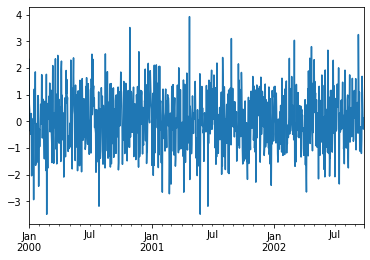

In [41]:
ts.plot()

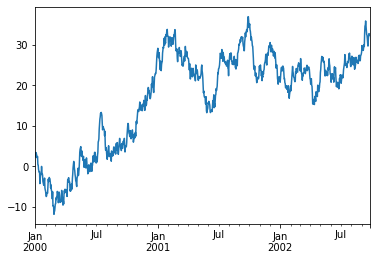

In [42]:
ts = ts.cumsum()
ts.plot()

In [43]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=["A", "B", "C", "D"])
df

,A,B,C,D
2000-01-01,1.578825,-1.476349,-0.781849,0.997237
2000-01-02,-2.189388,-1.853108,0.949636,0.538523
2000-01-03,-0.774238,-0.005394,-1.520021,-0.701292
2000-01-04,-0.865241,-0.583121,0.836844,-0.995746
2000-01-05,-0.992581,0.571174,-0.317781,0.939269
...,...,...,...,...
2002-09-22,-0.639631,-0.248732,2.698039,0.588861
2002-09-23,0.004637,0.575070,-1.389613,-0.410811
2002-09-24,0.202760,-1.205558,0.388676,0.939240
2002-09-25,-0.094618,0.307413,-1.345923,0.484385


<Figure size 432x288 with 0 Axes>

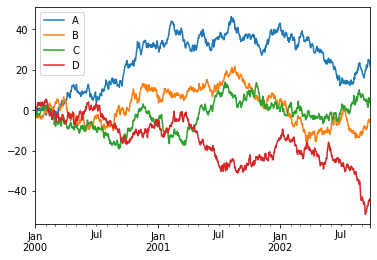

In [44]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## 比較
- 2つの表を比較して、

In [125]:
np.random.seed(123); df1 = pd.DataFrame(np.random.randn(5,5), columns=list("ABCDE"))
np.random.seed(123); df2_1 = pd.DataFrame(np.random.randn(2,3))
np.random.seed(456); df2_2 = pd.DataFrame(np.random.randn(3,3))
np.random.seed(789); df2_3 = pd.DataFrame(np.random.randn(5,2))

df2 = pd.concat([df2_1.append(df2_2).reset_index(drop=True), df2_3], axis=1)
df2.columns = list("ABCDE")

In [126]:
df1

,A,B,C,D,E
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881


In [127]:
df2

,A,B,C,D,E
0,-1.085631,0.997345,0.282978,-1.108111,-0.725719
1,-1.506295,-0.578600,1.651437,0.522804,1.234442
2,-0.668129,-0.498210,0.618576,0.096896,-0.987922
3,0.568692,1.350509,1.629589,0.067233,-0.592592
4,0.301966,0.449483,-0.345811,-0.931771,1.055363


In [110]:
df1 == df2

,0,1,2,3,4
0,True,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [111]:
df_mask = df1==df2
df_mask

,0,1,2,3,4
0,True,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [141]:
df_mask.where(df_mask==True, 1)

,0,1,2,3,4
0,True,True,True,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [143]:
import numpy as np
dfnpnp.where(df_mask==True, 1, 0)

array([[1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [119]:
df1.comapre(df2)

AttributeError: 'DataFrame' object has no attribute 'comapre'

In [136]:
for row in df1.itertuples():
    print(row)

Pandas(Index=0, A=-1.0856306033005612, B=0.9973454465835858, C=0.28297849805199204, D=-1.506294713918092, E=-0.5786002519685364)
Pandas(Index=1, A=1.651436537097151, B=-2.426679243393074, C=-0.42891262885617726, D=1.265936258705534, E=-0.8667404022651017)
Pandas(Index=2, A=-0.6788861516220543, B=-0.09470896893689112, C=1.4913896261242878, D=-0.638901996684651, E=-0.44398195964606546)
Pandas(Index=3, A=-0.43435127561851733, B=2.2059300827254558, C=2.1867860889737867, D=1.004053897878877, E=0.386186399174856)
Pandas(Index=4, A=0.7373685758962422, B=1.490732028150799, C=-0.9358338684023914, D=1.1758290447821034, E=-1.2538806677490124)


# API
- concat
- reset_index
- df.columns = [x,x,x,...]

### where